<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

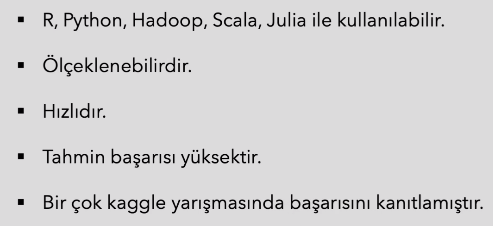

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

xgboost : kendi veri yapısında daha performanslı sonuçlar sağlamakta.

In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor().fit(X_train, y_train)

[22:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Tahmin

In [ ]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

359.91750599447033

## Model Tuning

In [ ]:
xgb_model

XGBRegressor()

In [ ]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[22:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [ ]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

[22:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_tuned2 = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.02, 
                         max_depth = 2, 
                         n_estimators = 1000) 

xgb_tuned2 = xgb_tuned2.fit(X_train,y_train)

[22:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.8356029309698

In [ ]:
y_pred2 = xgb_tuned2.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred2))

337.86064385558274